## Edwin Villafane Hernandez
### CISB 63
### Midterm project - Katy Perry Lyrics


In this project, I used several of the NLP techniques we've learned in class to explore Katy Perry lyrics. I got this dataset from https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset. 

I played around with the following techniques:
- POS
- NER
- Translation
- Subjectivity, 
- frequency distributions 
- remove stopwords
- lowercase
- wordCloud
- tokenization

and provided visuals wherever I saw fit.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

import re
import spacy
import en_core_web_sm
from textblob import TextBlob
from spacy import displacy 

2023-10-22 15:25:21.177574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
katy_perry = pd.read_csv('./data/KatyPerry.csv')

In [3]:
katy_perry.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Katy Perry,Swish Swish,Witness,2017.0,2017-05-19,refrain they know what is what but they don't ...
1,1,Katy Perry,Chained to the Rhythm,Witness,2017.0,2017-02-10,katy perry are we crazy living our lives throu...
2,2,Katy Perry,Dark Horse,PRISM,2013.0,2013-10-18,juicy j yeah ya'll know what it is katy perry ...
3,3,Katy Perry,Bon Appétit,Witness,2017.0,2017-04-28,quavo ayy yeah katy perry migos ayy katy per...
4,4,Katy Perry,Roar,PRISM,2013.0,2013-08-10,i used to bite my tongue and hold my breath sc...


In [4]:
katy_perry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  325 non-null    int64  
 1   Artist      325 non-null    object 
 2   Title       325 non-null    object 
 3   Album       241 non-null    object 
 4   Year        209 non-null    float64
 5   Date        209 non-null    object 
 6   Lyric       324 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 17.9+ KB


In [5]:
katy_perry.describe()

,Unnamed: 0,Year
count,325.000000,209.000000
mean,162.000000,2013.153110
std,93.963645,5.078755
min,0.000000,2001.000000
25%,81.000000,2009.000000
50%,162.000000,2013.000000
75%,243.000000,2017.000000
max,324.000000,2022.000000


In [6]:
katy_perry['Album'].unique()

array(['Witness', 'PRISM', 'Smile (Fan Edition)', 'Teenage Dream',
       'NOW That’s What I Call Music! 60 [US]',
       'Teenage Dream: The Complete Confection', 'One of the Boys', nan,
       'Fingerprints [Shelved]', 'Smile (Target Exclusive)',
       'Dear Evan Hansen (Original Broadway Cast Recording) [Deluxe Album]',
       'Unreleased Songs', 'Smile (Deluxe Edition)',
       'NOW That’s What I Call A Workout 2018',
       '(A) Katy Perry [Shelved]', 'MTV Unplugged', 'Katy Hudson',
       'Ur So Gay - EP', 'The Hello Katy Australian Tour EP',
       'MuchDance 2015', 'Foreign Object', 'Rise Remixes - EP',
       'I Kissed a Girl (Remixes) - EP',
       'The Hotel Café Presents: Winter Songs',
       'The One That Got Away (The Remixes) - EP',
       'Hot N Cold (Remixes) - EP', 'California Gurls (The Remixes) - EP',
       'E.T. (The Remixes) - EP', 'Waking Up in Vegas (The Remixes) - EP',
       'Dance (RED) Save Lives, Vol. 2', 'I Kissed a Girl - EP',
       'Teenage Dream - R

In [7]:

albums_of_interest = ['Witness', 
                      'PRISM', 
                      'Smile (Fan Edition)', 'Smile (Target Exclusive)', 'Smile (Deluxe Edition)',
                      'Teenage Dream', 'Teenage Dream: The Complete Confection']




In [8]:
filtered_df = katy_perry[katy_perry['Album'].isin(albums_of_interest)]


In [9]:
album_name_mapping = {
    'Smile (Fan Edition)': 'Smile',
    'Smile (Target Exclusive)': 'Smile',
    'Smile (Deluxe Edition)': 'Smile',
    'Teenage Dream': 'Teenage Dream',
    'Teenage Dream: The Complete Confection': 'Teenage Dream'
}

filtered_df['Album'] = filtered_df['Album'].replace(album_name_mapping)


In [10]:
filtered_df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Katy Perry,Swish Swish,Witness,2017.0,2017-05-19,refrain they know what is what but they don't ...
1,1,Katy Perry,Chained to the Rhythm,Witness,2017.0,2017-02-10,katy perry are we crazy living our lives throu...
2,2,Katy Perry,Dark Horse,PRISM,2013.0,2013-10-18,juicy j yeah ya'll know what it is katy perry ...
3,3,Katy Perry,Bon Appétit,Witness,2017.0,2017-04-28,quavo ayy yeah katy perry migos ayy katy per...
4,4,Katy Perry,Roar,PRISM,2013.0,2013-08-10,i used to bite my tongue and hold my breath sc...


In [11]:
filtered_df.shape

(73, 7)

In [12]:
filtered_df = filtered_df[['Title', 'Album', 'Lyric', 'Year']]

In [13]:
filtered_df.head()

,Title,Album,Lyric,Year
0,Swish Swish,Witness,refrain they know what is what but they don't ...,2017.0
1,Chained to the Rhythm,Witness,katy perry are we crazy living our lives throu...,2017.0
2,Dark Horse,PRISM,juicy j yeah ya'll know what it is katy perry ...,2013.0
3,Bon Appétit,Witness,quavo ayy yeah katy perry migos ayy katy per...,2017.0
4,Roar,PRISM,i used to bite my tongue and hold my breath sc...,2013.0


In [14]:
filtered_df.head()


,Title,Album,Lyric,Year
0,Swish Swish,Witness,refrain they know what is what but they don't ...,2017.0
1,Chained to the Rhythm,Witness,katy perry are we crazy living our lives throu...,2017.0
2,Dark Horse,PRISM,juicy j yeah ya'll know what it is katy perry ...,2013.0
3,Bon Appétit,Witness,quavo ayy yeah katy perry migos ayy katy per...,2017.0
4,Roar,PRISM,i used to bite my tongue and hold my breath sc...,2013.0


In [15]:
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 156
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   73 non-null     object 
 1   Album   73 non-null     object 
 2   Lyric   73 non-null     object 
 3   Year    71 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


In [16]:
filtered_df.describe()



,Year
count,71.000000
mean,2015.154930
std,3.694196
min,2010.000000
25%,2012.000000
50%,2017.000000
75%,2019.000000
max,2020.000000


In [17]:
filtered_df.isnull().sum()

Title    0
Album    0
Lyric    0
Year     2
dtype: int64

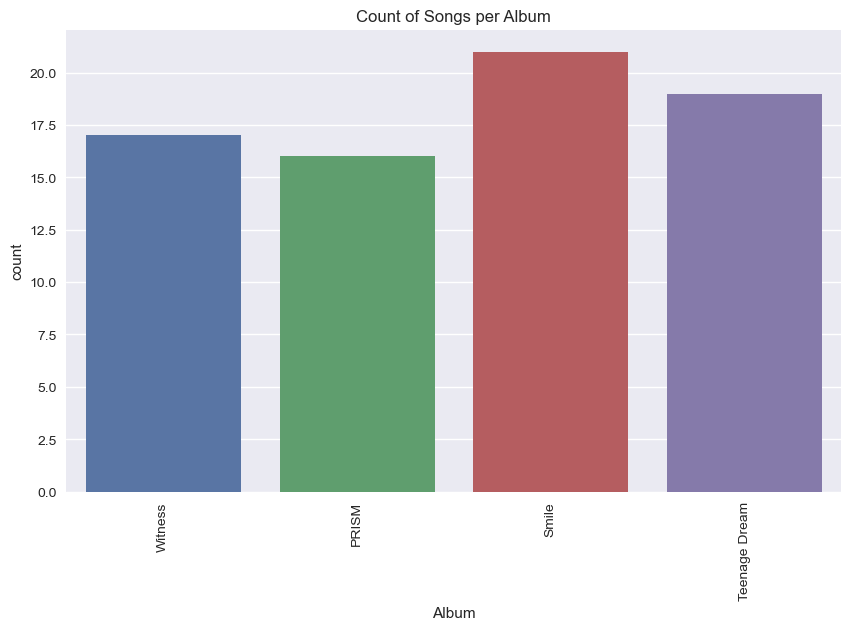

In [18]:
# Count of songs per album
plt.figure(figsize=(10, 6))
sns.countplot(x='Album', data=filtered_df)
plt.title('Count of Songs per Album')
plt.xticks(rotation=90)
plt.show()

tokenization and lemmatization

In [19]:
nlp = en_core_web_sm.load()
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    
    return tokens

filtered_df['Processed_Lyric'] = filtered_df['Lyric'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edwinv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/edwinv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
filtered_df.head()

,Title,Album,Lyric,Year,Processed_Lyric
0,Swish Swish,Witness,refrain they know what is what but they don't ...,2017.0,"[refrain, know, know, strut, fuck, katy, perry..."
1,Chained to the Rhythm,Witness,katy perry are we crazy living our lives throu...,2017.0,"[katy, perry, crazy, living, life, lens, trap,..."
2,Dark Horse,PRISM,juicy j yeah ya'll know what it is katy perry ...,2013.0,"[juicy, j, yeah, ya, know, katy, perry, juicy,..."
3,Bon Appétit,Witness,quavo ayy yeah katy perry migos ayy katy per...,2017.0,"[quavo, ayy, yeah, katy, perry, migos, ayy, ka..."
4,Roar,PRISM,i used to bite my tongue and hold my breath sc...,2013.0,"[use, bite, tongue, hold, breath, scare, rock,..."


frequency distributions

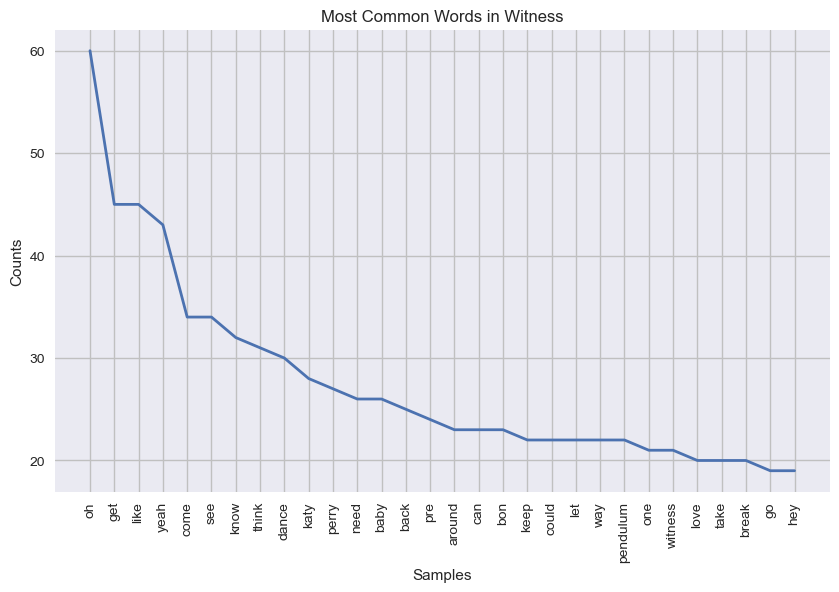

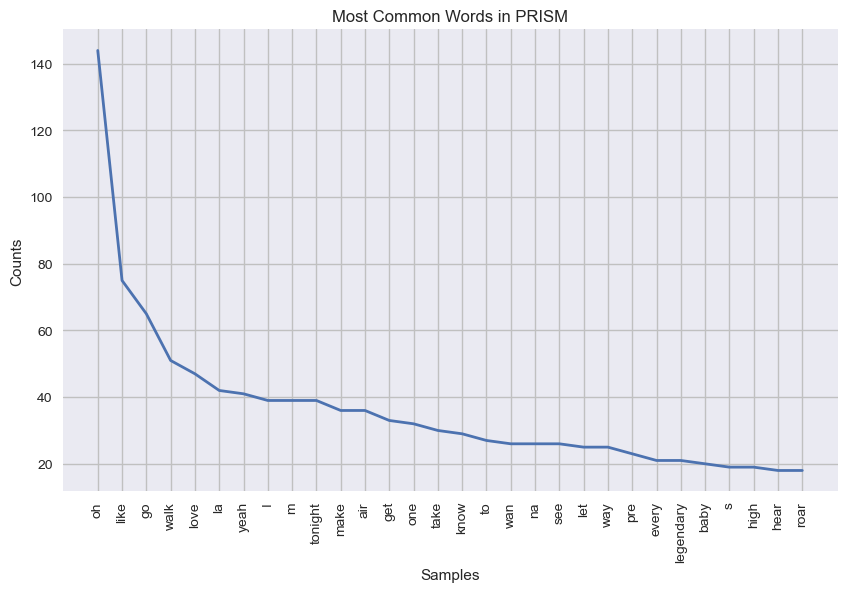

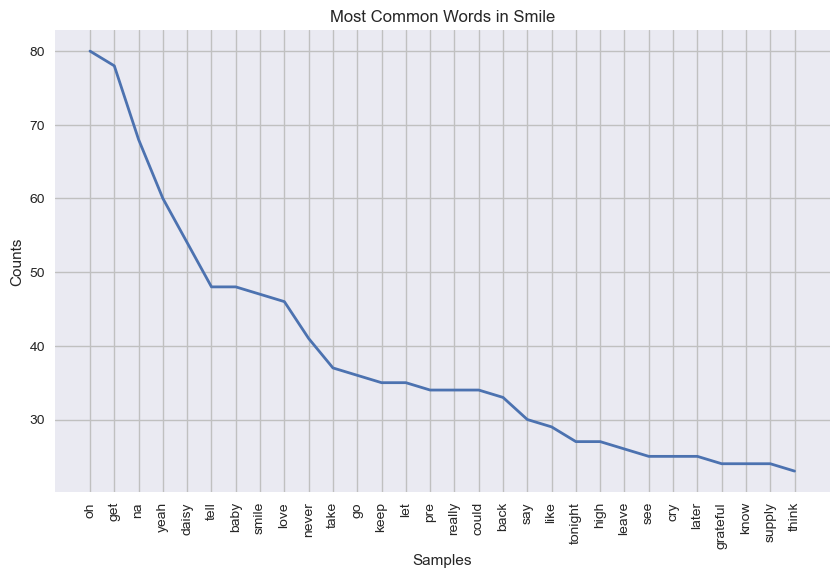

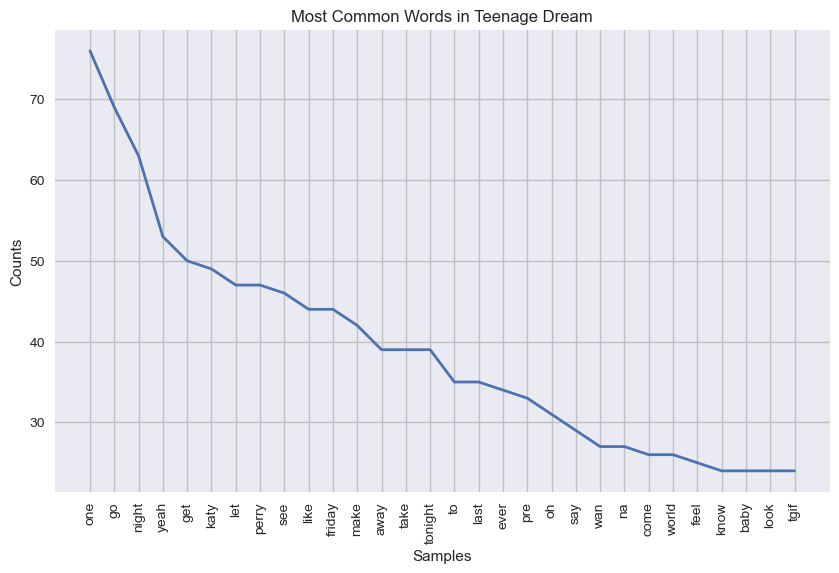

In [21]:
def get_album_word_frequency(album_name):
    text = " ".join(" ".join(tokens) for tokens in filtered_df[filtered_df['Album'] == album_name]['Processed_Lyric'])
    words = word_tokenize(text)
    fdist = FreqDist(words)
    return fdist

unique_albums = filtered_df['Album'].unique()

for album_name in unique_albums:
    fdist = get_album_word_frequency(album_name)
    plt.figure(figsize=(10, 6))
    fdist.plot(30, title=f'Most Common Words in {album_name}', cumulative=False)
    plt.show()


POS tagging

In [22]:
def pos_tag(text):
    return nltk.pos_tag(text)

filtered_df['POS_Tagged'] = filtered_df['Processed_Lyric'].apply(pos_tag)



NER

In [23]:
def ner(text):
    return [(entity.text, entity.label_) for entity in nlp(text).ents]

filtered_df['NER'] = filtered_df['Lyric'].apply(ner)



subjectivity

In [24]:
def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

filtered_df['Subjectivity'] = filtered_df['Lyric'].apply(get_subjectivity)

word cloud creation

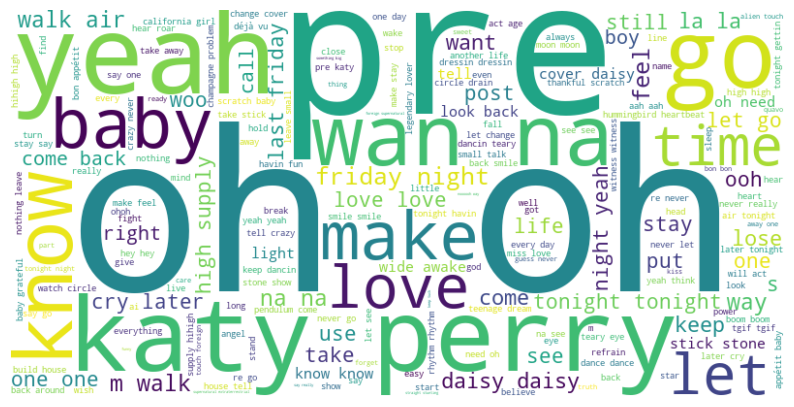

In [25]:
def create_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

lyrics_text = " ".join(" ".join(tokens) for tokens in filtered_df['Processed_Lyric'])
create_word_cloud(lyrics_text)

In [26]:
filtered_df.head()

,Title,Album,Lyric,Year,Processed_Lyric,POS_Tagged,NER,Subjectivity
0,Swish Swish,Witness,refrain they know what is what but they don't ...,2017.0,"[refrain, know, know, strut, fuck, katy, perry...","[(refrain, NN), (know, VBP), (know, VBP), (str...","[(katy perry, PERSON), (today, DATE), (katy pe...",0.630376
1,Chained to the Rhythm,Witness,katy perry are we crazy living our lives throu...,2017.0,"[katy, perry, crazy, living, life, lens, trap,...","[(katy, NN), (perry, NN), (crazy, NN), (living...","[(katy perry, PERSON), (katy perry, PERSON), (...",0.550760
2,Dark Horse,PRISM,juicy j yeah ya'll know what it is katy perry ...,2013.0,"[juicy, j, yeah, ya, know, katy, perry, juicy,...","[(juicy, NN), (j, NN), (yeah, NN), (ya, NN), (...","[(katy perry, PERSON), (katy perry, PERSON), (...",0.633213
3,Bon Appétit,Witness,quavo ayy yeah katy perry migos ayy katy per...,2017.0,"[quavo, ayy, yeah, katy, perry, migos, ayy, ka...","[(quavo, NN), (ayy, NN), (yeah, NN), (katy, NN...","[(quavo ayy, PERSON), (katy perry, PERSON), (k...",0.584003
4,Roar,PRISM,i used to bite my tongue and hold my breath sc...,2013.0,"[use, bite, tongue, hold, breath, scare, rock,...","[(use, NN), (bite, NN), (tongue, NN), (hold, V...","[(dr luke max martin, PERSON)]",0.408135


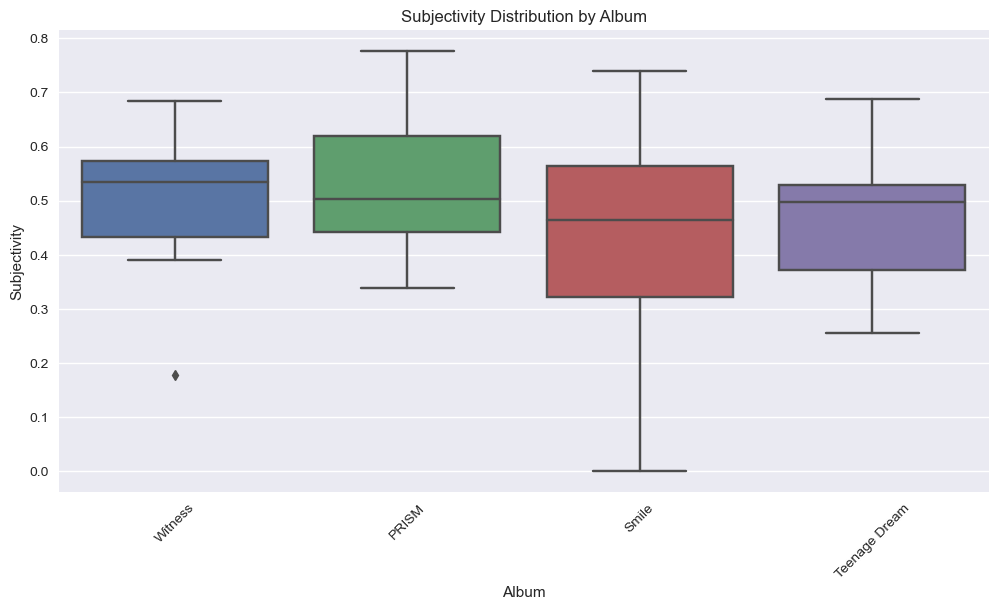

In [27]:
# distribution of subjectivity by album
plt.figure(figsize=(12, 6))
sns.boxplot(x='Album', y='Subjectivity', data=filtered_df)
plt.title('Subjectivity Distribution by Album')
plt.xticks(rotation=45)
plt.show()

In [28]:
# this song has several cities and countries so it's a good candidate
fn = filtered_df[filtered_df['Title']== 'International Smile']

In [29]:
fn['Lyric']

59    flowers in her hair she don't care peachpink l...
Name: Lyric, dtype: object

In [30]:
lyrics = fn['Lyric'].values[0]

doc = nlp(lyrics)

displacy.render(doc, style="ent", jupyter=True, options={'distance': 110})

translation

In [31]:
lyrics_blob = TextBlob(lyrics)
translated_lyrics = lyrics_blob.translate('en', 'fr')
print(translated_lyrics)


Fleurs dans ses cheveux, elle ne s'en soucie pas Elle dirige l'endroit comme Penny Lane Ooh ouais tu as de la chance si tu es dans son avion de Tokyo au Mexique à Rio que les filles un voyage un billet à un sens vous mène si haut car elle a ce sourire international. tu peux ouais elle est tellement en demande te prend miles haut si haut parce que elle a ce sourire international shes shes a ce je ne sais quoi tu le sais si très chic ouais elle est une ooh classique ouais shes footloose et si fantaisie ooh ouais elle danse À son propre battement parce qu'elle est la muse et l'artiste laisse toujours une trace de sardust ooh 'car elle est un peu de Yoko Ooh et elle est un peu de oh non de La Miami à New York que les filles un voyage a un air uniforme le billet vous prend des kilomètres si haut car elle a ce qu'un sourire international la rattrape si vous pouvez la rattraper si vous pouvez ouais elle est tellement en demande à la demande vous prend des kilomètres si haut car elle a ce seul

Summary and conclusion

It turns out that the Katy Perry albums I took a look at all had similar levels of subjectivity which surprised me as I would've thought that perhaps Witness, her more serious album, would be the clear outlier there. Also NER is powerful in extracting important information and it was able to pick some cities and countries in one of Katy's songs. It's also interesting that the titles of her songs are some of the bigger words in the word cloud, suggesting that her choruses repeat the titles a lot.